In [1]:
import scipy.stats as sts
import scipy.special as scp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('IB_statistics_data_hw6.txt', 'r')
line_1 = f.readline()
list_ex = line_1.split(' ')
list_ex

['Ex1a', 'Ex1b', 'Ex1c', 'Ex2', 'Ex3', 'Ex4\n']

In [3]:
data = [[] for x in range(len(list_ex))]
data

for line in f:
    res = line.split(' ')
    for i in range(len(res)):
        data[i].append(res[i])
        
for i in range(len(data)-1):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])

In [4]:
#1a

arr_1 = data[0]
arr_1 = np.array(sorted(arr_1))
arr_1 = arr_1.reshape((7, 10))

x_mean = arr_1.mean()
n = len(arr_1)*10
n_batches = len(arr_1)
lambda_0 = 33.4

print(x_mean, n)

36.857142857142854 70


In [5]:
arr_1

array([[24., 24., 25., 26., 26., 26., 28., 28., 29., 29.],
       [30., 30., 31., 31., 31., 31., 32., 33., 33., 33.],
       [33., 34., 34., 34., 34., 34., 35., 35., 35., 35.],
       [35., 35., 36., 36., 36., 37., 37., 37., 37., 38.],
       [38., 38., 38., 38., 38., 39., 39., 39., 40., 40.],
       [40., 40., 41., 41., 41., 42., 42., 44., 45., 45.],
       [46., 46., 46., 48., 48., 48., 49., 50., 51., 53.]])

In [6]:
def dist_func_1(x, lambda_0):
    k = 0
    sum_tmp = 0
    while k < x:
        sum_tmp += (lambda_0**k)*np.exp(-lambda_0)/np.math.factorial(k)
        k += 1
    return sum_tmp
        

#Chi2
data_chi2 = []
chi_2 = 0
for x in arr_1:
    tmp = x
    l = len(tmp)
    p = dist_func_1(tmp[-1], lambda_0) - dist_func_1(tmp[0], lambda_0)
    chi_2 += ((l-n*p)**2)/(n*p)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print('Chi square:')
print(g1, chi_2, g2)

Chi square:
1.237344245791203 53.59779992341472 14.44937533544792


In [7]:
# ЦПТ

g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n/lambda_0)*(lambda_0 - x_mean)

print('ЦПТ:')
print(g_1, s, g_2)

ЦПТ:
-1.9599639845400545 -5.004873587175795 1.959963984540054


### 1c

In [18]:
arr_3 = data[2]
arr_3 = np.array(sorted(arr_3))
arr_3_re = arr_3.reshape((5, 14))

x_mean = arr_3.mean()
n = len(arr_3)
X_ep = arr_3
n_batches = len(arr_3_re)

print(x_mean, n)

10.557142857142857 70


In [19]:
arr_3_re

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,
         3.],
       [ 3.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,  7.,  7.,  8.,  8.,  8.,
         8.],
       [ 8.,  8.,  8.,  9., 10., 10., 10., 11., 11., 11., 12., 12., 12.,
        13.],
       [13., 14., 14., 15., 15., 16., 16., 16., 17., 17., 17., 17., 18.,
        18.],
       [19., 19., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20.]])

Chi square:
0.48441855708793014 37.01333333333327 11.143286781877796


<function matplotlib.pyplot.show(*args, **kw)>

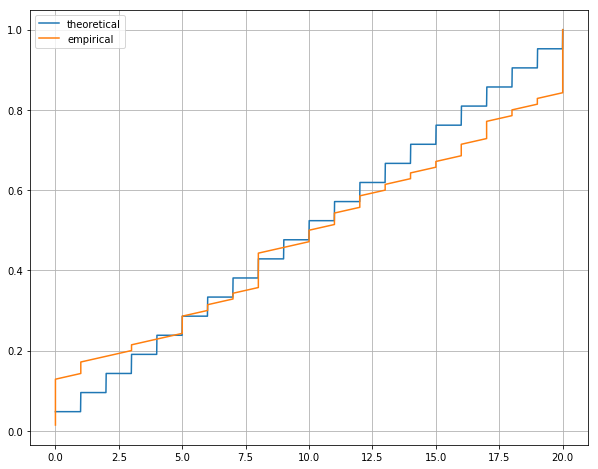

In [20]:
def dist_func_3(x):
    return sts.randint.cdf(x, 0, 21)
        

#prepairing data

chi_2 = 0
for x in arr_3_re:
    tmp = x
    l = len(tmp)
    p = dist_func_3(tmp[-1]) - dist_func_3(tmp[0])
    chi_2 += ((l-n*p)**2)/(n*p)
    if n*p < 0.00001:
        print(x)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print('Chi square:')
print(g1, chi_2, g2)

X = np.linspace(0, 20, 2000)
Y = dist_func_3(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [21]:
std_2 = 0
u = np.arange(0, 21)
for x in u:
    std_2 += (1/21)*(x**2)

g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n/std_2)*(10 - x_mean)

print('ЦПТ:')
print(g_1, s, g_2)

ЦПТ:
-1.9599639845400545 -0.39873493330573306 1.959963984540054


### 1b

In [22]:
arr_2 = data[1]
arr_2 = np.array(sorted(arr_2))
arr_2_re = arr_2.reshape((7, 10))

x_mean = arr_2.mean()
n = len(arr_2)
X_ep = arr_2
n_batches = len(arr_2_re)

print(x_mean, n)

8.728571428571428 70


In [23]:
arr_2_re

array([[ 2.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  9.,  9.],
       [ 9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 11.],
       [11., 11., 11., 11., 12., 12., 13., 13., 13., 13.],
       [13., 14., 15., 15., 16., 16., 17., 19., 19., 20.]])

Chi square:
1.237344245791203 28.200884753790845 14.44937533544792


<function matplotlib.pyplot.show(*args, **kw)>

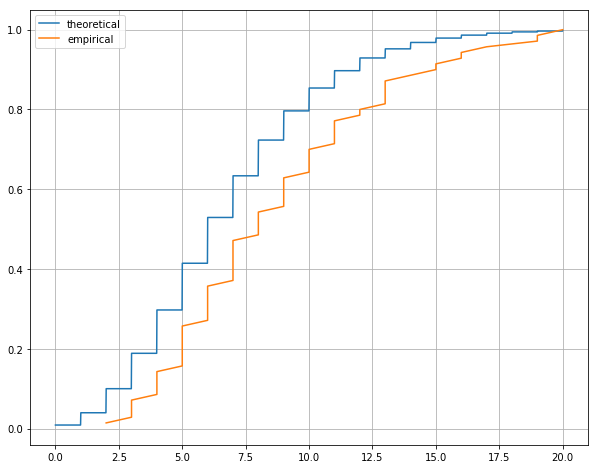

In [24]:
def dist_func_2(x):
    return sts.nbinom.cdf(x, 7, 0.51)
        

#prepairing data

chi_2 = 0
for x in arr_2_re:
    tmp = x
    l = len(tmp)
    p = dist_func_2(tmp[-1]) - dist_func_2(tmp[0])
    if n*p < 0.00001:
        print(x)
    chi_2 += ((l-n*p)**2)/(n*p)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print('Chi square:')
print(g1, chi_2, g2)

X = np.linspace(0, 20, 2000)
Y = dist_func_2(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [25]:
p = 0.51
r = 7

g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n*(p**2)/(r*(1-p)))*(r*(1-p)/p - x_mean)

print('ЦПТ:')
print(g_1, s, g_2)

ЦПТ:
-1.9599639845400545 -4.614989295482466 1.959963984540054


### 2

In [11]:
#2

arr_4 = data[3]
arr_4 = np.array(sorted(arr_4))
x_mean = arr_4.mean()
X_ep = arr_4
n = len(arr_4)

arr_4_re = arr_4.reshape((7, 10))
n_batches = len(arr_4_re)

print(x_mean, n)

0.7953535133895179 70


<function matplotlib.pyplot.show(*args, **kw)>

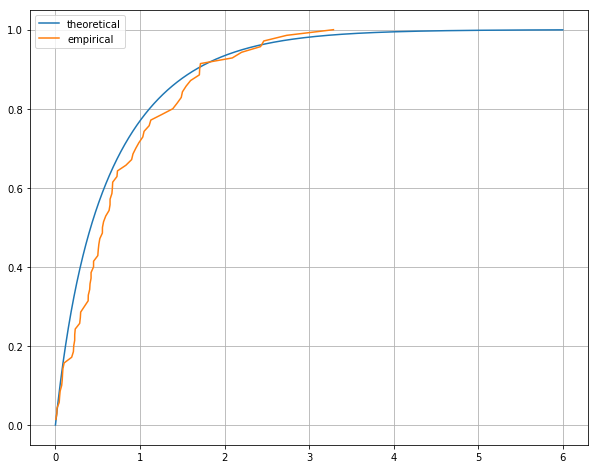

In [12]:
def dist_func_4(x):
    return 0.2*sts.expon.cdf(x, scale = 1/5) + 0.8*sts.expon.cdf(x, scale = 1/1.25)

def emp_dist_func(arr):
    res = []
    res_1 = []
    n = len(arr)
    for i in range(1,n+1):
        res.append(i/n)
        res_1.append((i-1)/n)
    return res, res_1

X = np.linspace(0, 6, 2000)
Y = dist_func_4(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [13]:
func = dist_func_4

def finding_sup(X_ep, emp_dist_func:callable, func:callable):
    res = 0
    x_ind = 0 
    n = len(X_ep)
    Y_ep, Y_ep_1 = emp_dist_func(X_ep)
    for i in range(n):
        m = np.sqrt(n)*abs(Y_ep[i] - func(X_ep[i]))
        m_1 = np.sqrt(n)*abs(Y_ep_1[i] - func(X_ep[i]))
        if m > res:
            res = m
            x_ind = X_ep[i]
        if m_1 > res:
            res = m_1
            x_ind = X_ep[i]
    #print(x_ind)
    print('Kolmogorov:')
    print(res)
    return res

# KOLMOGOROV
t = finding_sup(X_ep, emp_dist_func, func)

Kolmogorov:
1.4883552425864475


In [14]:
# ЦПТ

lam = 0.2*1/5 + 0.8/1.25
std = np.sqrt(0.2*(1/5**2) + 0.8/(1.25**2))
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n)*(lam - x_mean)/std

print('ЦПТ:')
print(g_1, s, g_2)

ЦПТ:
-1.9599639845400545 -1.3383761067279922 1.959963984540054


In [15]:
# Хи-2

chi_2 = 0
for x in arr_4_re:
    tmp = x
    l = len(tmp)
    p = dist_func_4(tmp[-1]) - dist_func_4(tmp[0])
    if n*p < 0.00001:
        print(x)
    chi_2 += ((l-n*p)**2)/(n*p)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print('Chi square:')
print(g1, chi_2, g2)

Chi square:
1.237344245791203 9.704425562640543 14.44937533544792


### №3

In [66]:
#3

arr_5 = data[4]
arr_5 = np.array(sorted(arr_5))
x_mean = arr_5.mean()
X_ep = arr_5
n = len(arr_5)

print(x_mean, n)

0.10684294265994265 70


In [67]:
arr_5

array([-0.39658227, -0.37440483, -0.36947088, -0.35562483, -0.34839158,
       -0.34722408, -0.33700254, -0.33495402, -0.31866735, -0.2738418 ,
       -0.26450573, -0.26238463, -0.25381862, -0.2216277 , -0.22015455,
       -0.20128668, -0.1892993 , -0.15783375, -0.15107679, -0.13688598,
       -0.09996721, -0.09301409, -0.08368365,  0.00121702,  0.01029936,
        0.02234459,  0.04495189,  0.04612292,  0.04969726,  0.05020527,
        0.06531732,  0.08491631,  0.0904994 ,  0.0909554 ,  0.09432966,
        0.09689868,  0.13062438,  0.1339582 ,  0.14142864,  0.145347  ,
        0.15071645,  0.15852411,  0.18748417,  0.21644081,  0.21771293,
        0.24193741,  0.25937089,  0.2890589 ,  0.29259823,  0.30471181,
        0.308948  ,  0.3487539 ,  0.38186356,  0.38566951,  0.41119298,
        0.44345315,  0.46930631,  0.49856673,  0.50072762,  0.50330709,
        0.50588633,  0.52196361,  0.52200163,  0.52648964,  0.53752387,
        0.53854819,  0.54957987,  0.55580314,  0.55911882,  0.58

<function matplotlib.pyplot.show(*args, **kw)>

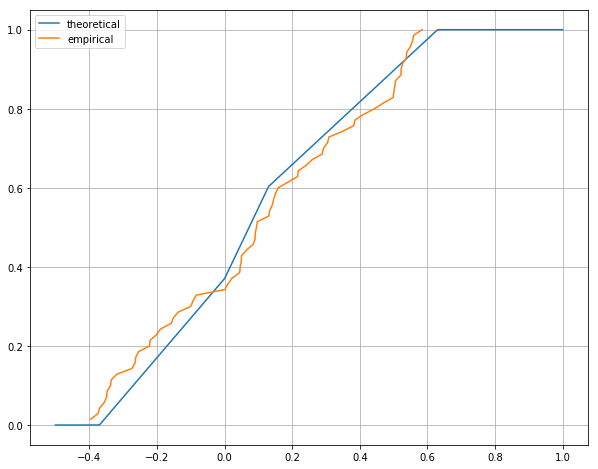

In [64]:
def dist_func_5(x, m=0.63):
    return 0.5*sts.uniform.cdf(x, loc=0, scale=m) + 0.5*sts.uniform.cdf(x, loc=m-1, scale=0.5)

X = np.linspace(-0.5, 1, 2000)
Y = dist_func_5(X, 0.63)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [65]:
# Kolmogorov

func = dist_func_5
t = finding_sup(X_ep, emp_dist_func, func)

Kolmogorov:
0.7478438055089157


In [105]:
gamma = sts.uniform.rvs(-0.2, 0.3, size = 50)

eta = []
for x in gamma:
    eta.append(x+0.1)
    
eta = np.array(list(zip(gamma, eta)))
eta

array([[-0.12351227, -0.02351227],
       [-0.00192483,  0.09807517],
       [-0.13886305, -0.03886305],
       [ 0.06646085,  0.16646085],
       [ 0.06264679,  0.16264679],
       [-0.17073919, -0.07073919],
       [ 0.03771785,  0.13771785],
       [ 0.07421673,  0.17421673],
       [-0.14329946, -0.04329946],
       [-0.02959281,  0.07040719],
       [-0.15155498, -0.05155498],
       [ 0.07808254,  0.17808254],
       [-0.19875831, -0.09875831],
       [-0.17063524, -0.07063524],
       [-0.10686388, -0.00686388],
       [ 0.01942626,  0.11942626],
       [-0.17659145, -0.07659145],
       [-0.08495791,  0.01504209],
       [-0.03854464,  0.06145536],
       [-0.00593265,  0.09406735],
       [ 0.0232193 ,  0.1232193 ],
       [-0.03275339,  0.06724661],
       [-0.19799247, -0.09799247],
       [-0.0127579 ,  0.0872421 ],
       [-0.19638256, -0.09638256],
       [-0.11694235, -0.01694235],
       [-0.04713337,  0.05286663],
       [-0.10904408, -0.00904408],
       [ 0.06957942,

In [106]:
def experiment(interval_arr, arr_5):
    num_exp = []
    for y in interval_arr:
        a = y[0]
        b = y[1]
        n = 0
        for x in arr_5:
            #print(x, a, b)
            if (x > a) and (x < b):
                n += 1
        num_exp.append(n)
    return np.array(num_exp)
num_exp = experiment(eta, arr_5)

<function matplotlib.pyplot.show(*args, **kw)>

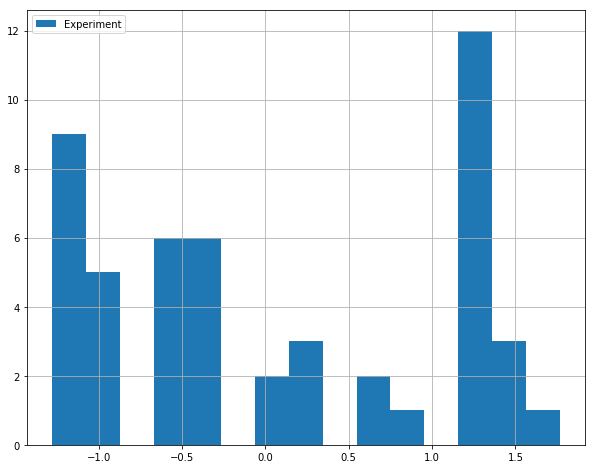

In [107]:
mean = num_exp.mean()
std = num_exp.std()
m = len(num_exp)

eta_trans = []

for x in num_exp:
    res = (x - mean)/std
    eta_trans.append(res)
    
f = plt.figure(figsize = (10, 8))
plt.hist(eta_trans, bins=15, density=False, label='Experiment')
plt.legend()
plt.grid()
plt.show

In [108]:
# Shapiro-Wilk test

sts.shapiro(eta_trans)

(0.8797732591629028, 0.00011013195035047829)

* Таким образом критерий $H_0$ отвергается $\rightarrow$ такая вероятность зависит не только от $l$